In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Models\tic_ag.csv')
df

,SERNO,POINTSERNO,PROFILEDATE,IMPORTVALUE,IMPORTESTIMATED,IMPORTNETTING,DATASTATUS
0,176669090,5685,20240217220000,0.199800,0.212184,0.199800,2
1,176669091,170304,20240217220000,0.003407,0.004754,0.003407,2
2,176669092,89333,20240217220000,0.039480,0.046308,0.039480,2
3,176669093,58756,20240217220000,0.001770,0.002742,0.001770,2
4,176669094,47308,20240217220000,0.001394,0.001145,0.001394,2
...,...,...,...,...,...,...,...
611131,189058840,47307,20240329200000,0.004895,0.003773,0.004895,2
611132,189058841,43725,20240329200000,0.000755,0.000755,0.000656,4
611133,199935105,51836,20240401210000,0.007920,NaN,0.007920,2
611134,199935106,51836,20240401220000,0.003500,NaN,0.003500,2


In [14]:
filtered_df = df[['POINTSERNO', 'PROFILEDATE', 'IMPORTNETTING']]


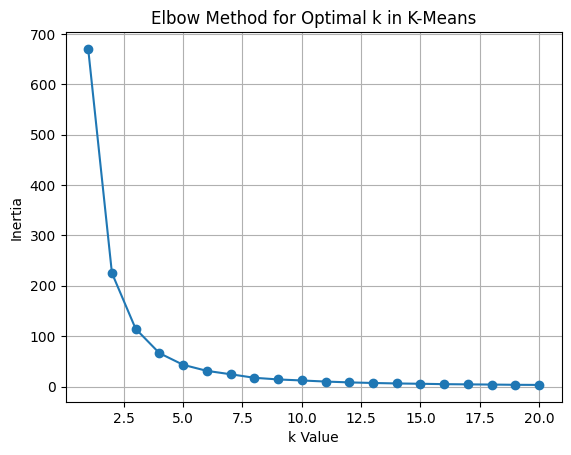

Cluster Centers:
 [[0.00822325]
 [0.10595658]
 [0.03490137]
 [0.23421478]]


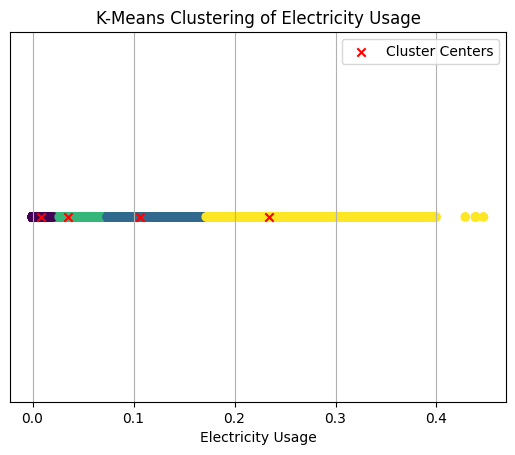

In [28]:
# Farklı k değerleri için toplam kare hatasını hesaplama
k_values = range(1, 21)
inertia = []
X=filtered_df[['IMPORTNETTING']]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Inertia değerlerini görselleştirme
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k in K-Means')
plt.xlabel('k Value')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# En uygun k değerini seçtikten sonra K-Means uygulama
optimal_k = 4  # Örnek olarak en uygun k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
filtered_df.loc[:,'cluster'] = kmeans.fit_predict(X)

# Küme merkezlerini ve her bir kümenin ortalama tüketim değerini gösterme
centers = kmeans.cluster_centers_
print("Cluster Centers:\n", centers)

# Kümeleme sonuçlarını görselleştirme
plt.scatter(filtered_df['IMPORTNETTING'], [0]*len(filtered_df), c=filtered_df['cluster'], cmap='viridis')
plt.scatter(centers, [0]*len(centers), c='red', marker='x', label='Cluster Centers')
plt.title('K-Means Clustering of Electricity Usage')
plt.xlabel('Electricity Usage')
plt.yticks([])  # Y eksenini kaldırma
plt.legend()
plt.grid(True)
plt.show()

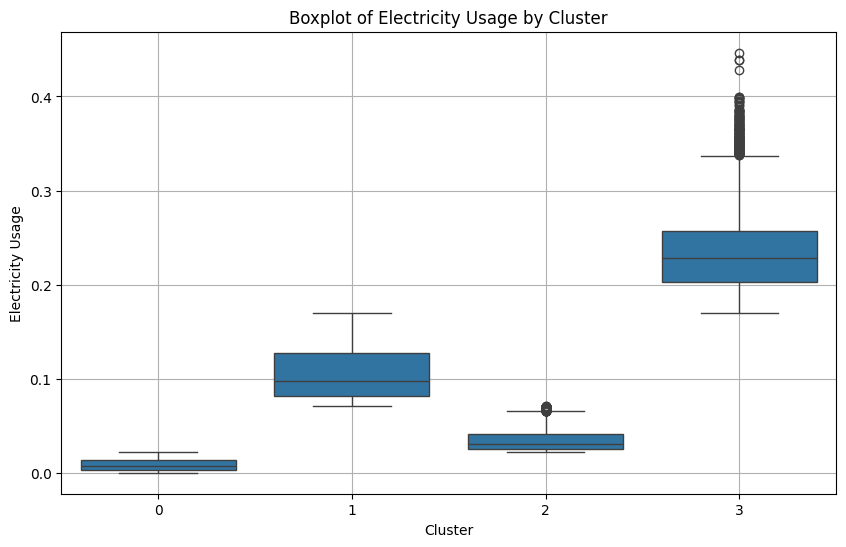

In [29]:
# Boxplot ile kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='IMPORTNETTING', data=filtered_df)
plt.title('Boxplot of Electricity Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Electricity Usage')
plt.grid(True)
plt.show()